In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import acquire as a
import prepare as p
import explore as e
import nltk
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
reload(p)
df = a.get_michelin_pages()
train, validate, test = p.prepare_michelin(df)

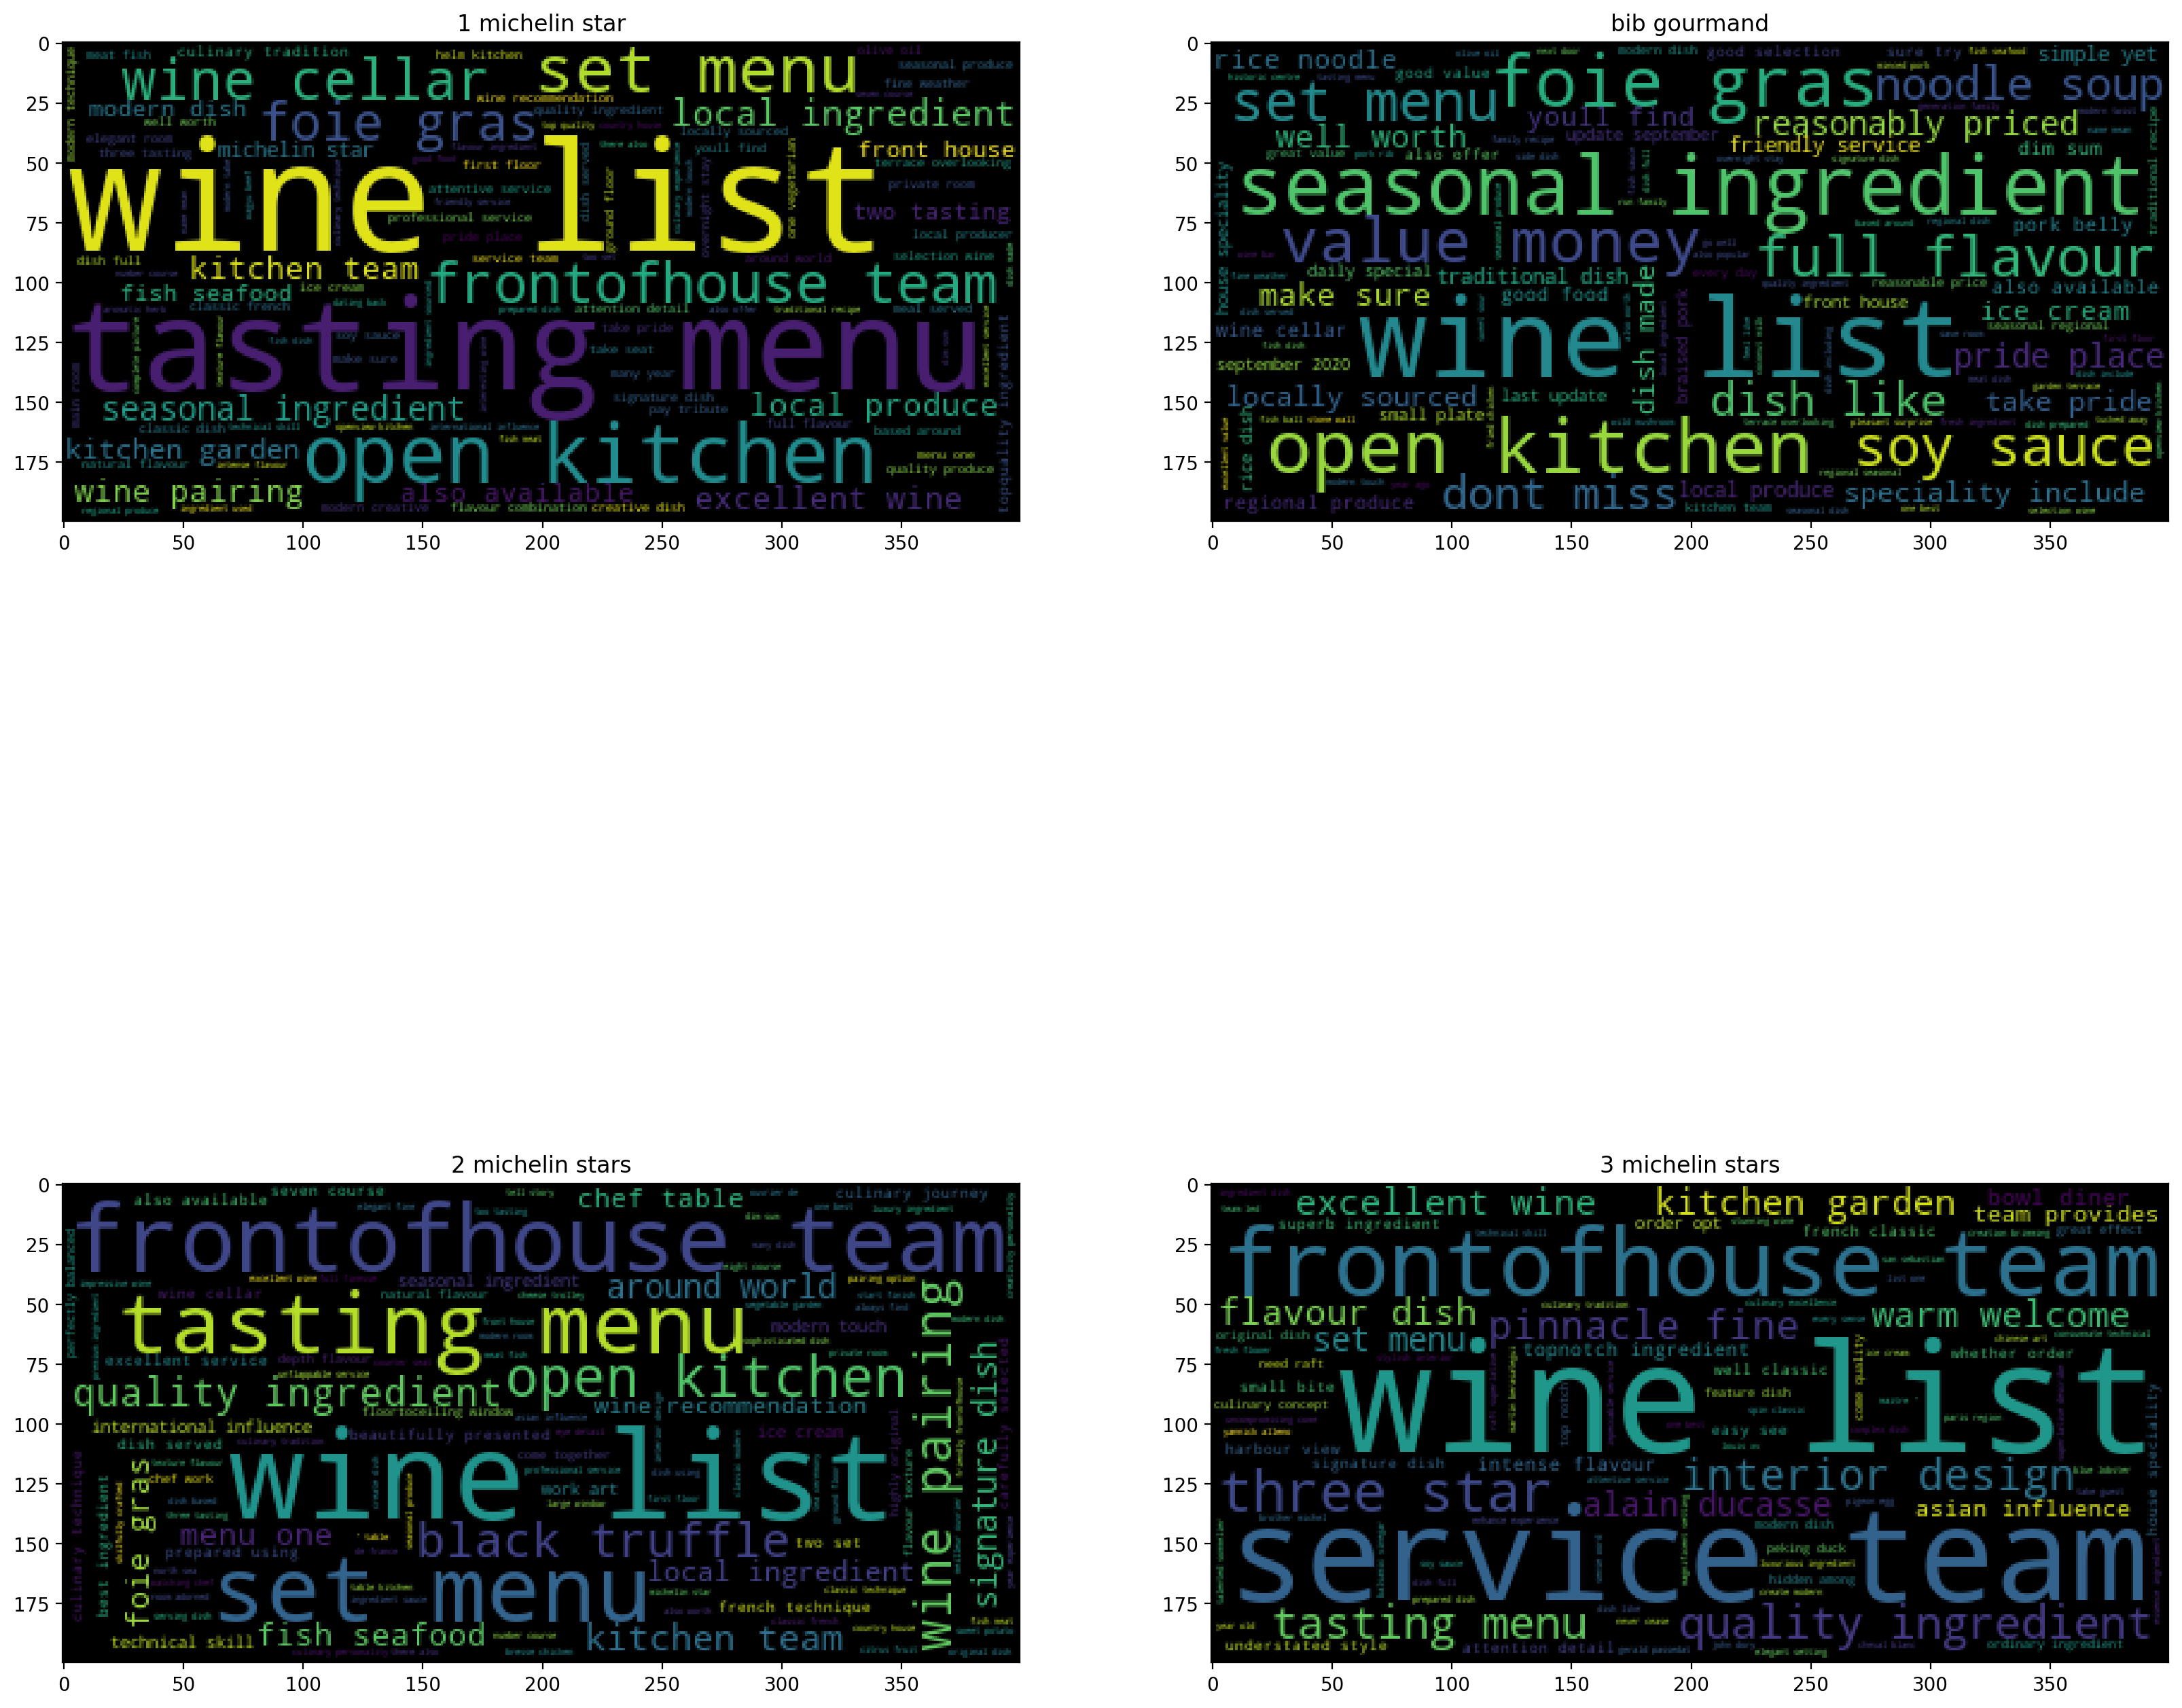

In [4]:
award_strings = train.award.astype('string').values.unique()
fig, axs = plt.subplots(2,2,figsize=(20,20))
for i in range(len(award_strings)):
    ax = axs[(i)//2,(i%2)]
    ax.set_title(award_strings[i])
    e.generate_word_cloud(train[train.award.str.contains(award_strings[i])].lemmatized,2,ax)

In [56]:
COMMON_NGRAMS = ['la carte','wine list']
def remove_common_ngrams(lemmatized_string:str,ngrams=COMMON_NGRAMS)->str:
    for n in ngrams:
       lemmatized_string = ''.join(lemmatized_string.split(n))
    return lemmatized_string

<AxesSubplot:ylabel='award'>

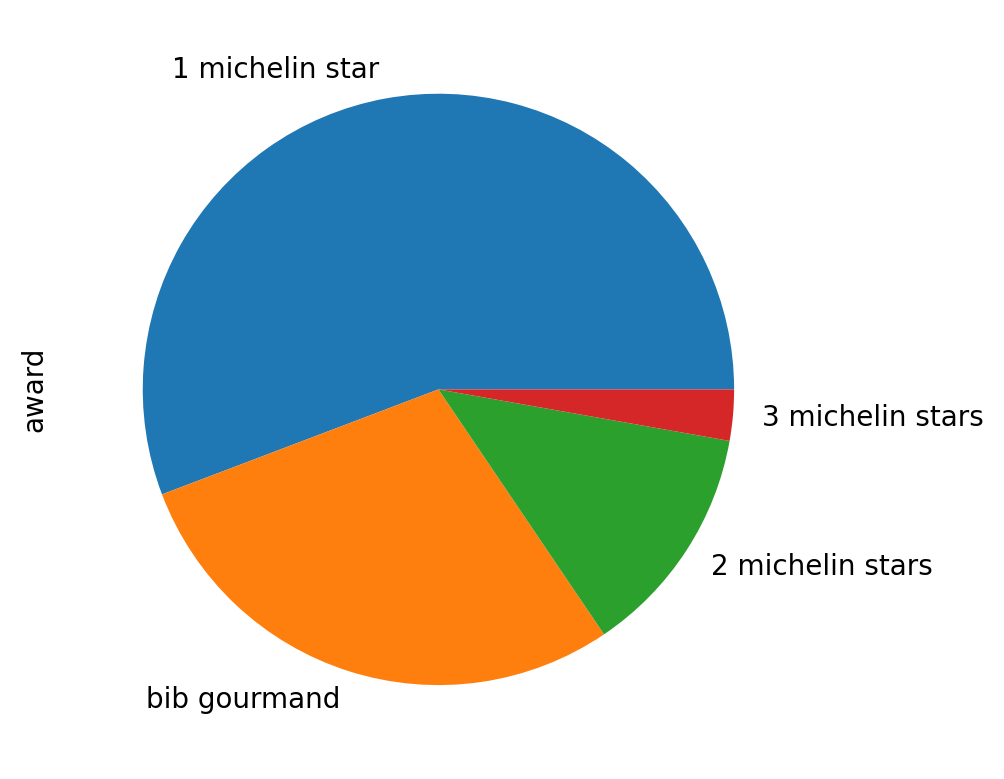

In [6]:
train[train.lemmatized.str.contains('wine list')].award.value_counts(normalize=True).plot.pie()

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 1594 to 1553
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   name                     3796 non-null   string  
 1   address                  3796 non-null   string  
 2   location                 3796 non-null   string  
 3   price                    3796 non-null   object  
 4   cuisine                  3796 non-null   string  
 5   longitude                3796 non-null   float64 
 6   latitude                 3796 non-null   float64 
 7   url                      3796 non-null   object  
 8   award                    3796 non-null   category
 9   facilities_and_services  3796 non-null   string  
 10  data                     3796 non-null   string  
 11  price_level              3796 non-null   int64   
 12  city                     3796 non-null   object  
 13  country                  3796 non-null   object  
 14  clean

name                         string
address                      string
location                     string
price                        object
cuisine                      string
longitude                   float64
latitude                    float64
url                          object
award                      category
facilities_and_services      string
data                         string
price_level                   int64
city                         object
country                      object
clean                        string
lemmatized                   string
dtype: object